Data Analysis exercise by Nahid Oulmi.

# The Data

Here is a data analysis exercise based on a modified and anonymized dataset containing information about rides by an App/VTC company. The goal of this notebook is to provide some answers and analysis to the questions one may ask in a professionnal environment.

It stores 202 055 records total. It does not only contains successful rides but also failed ride requests for example. The “state” field holds that information. The rides are located in France and especially in Paris. 

The different features are :

| Field                       | Type      | Meaning                                                                                                       |
| --------------------------- | --------- | ------------------------------------------------------------------------------------------------------------- |
| Id                          | Int       | Ride identifier                                                                                               |
| Created_at                  | Timestamp | Date time of the ride request creation                                                                        |
| State                       | String    | Ride final state : canceled by driver / canceled by user / canceled by orperator / booking failed/ terminated |
| User Id                     | Int       | Passenger identifier                                                                                          |
| Driver Id                   | Int       | Driver identifier                                                                                             |
| Origin Adress               | String    | Pick up location address                                                                                      |
| Origin Latitude             | Numeric   | Pick up location latitude                                                                                     |
| Origin Longitude            | Numeric   | Pick up location longitude                                                                                    |
| Arrival Address             | String    | Drop of location address                                                                                      |
| Arrival Latitude            | Numeric   | Drop of location latitude                                                                                     |
| Arrival Longitude           | Numeric   | Drop of location longitude                                                                                    |
| Estimated Approach Duration | Int       | Estimated time for the driver to reach the pick up location upon accept thing ride request                    |
| Mode                        | Int       | Payment mode 1 is for Credit Card 0 is for cash                                                               |
| Price estimation            | Int       | Estimated Fare                                                                                                |



In [1]:
#import dependant libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
#import data

data = pd.read_csv("Clementine - Data.csv", encoding = "utf-8", sep = "\t")

In [3]:
#Get the number and data type of features

print ("Number of rides & number of features : ", data.shape, "\n")
print ("Features and data type of features : \n", data.dtypes)

Number of rides & number of features :  (202055, 14) 

Features and data type of features : 
 Arrival Address                 object
Arrival Latitude               float64
Arrival Longitude              float64
Created At                      object
Driver Id                      float64
Estimated Approach Duration    float64
Estimated Price                  int64
Id                              object
Origin Address                  object
Origin Latitude                float64
Origin Longitude               float64
Payment Mode                    object
State                           object
User Id                          int64
dtype: object


In [4]:
#The "Created At" series is of the String datatype, which is not useful if we want to do time series analysis.
#Let's convert it to a support time data type by Pandas. Pandas works great with time series.
data["Created At"] = pd.to_datetime(data["Created At"])

The "Created at" feature use a string object to describe the time of the ride request. By day we mean business day. Hence Monday September 12th corresponds to data between monday September 12th 12pm and Tuesday September 13th 12pm.

Here we don't speak about days ranging from 12am to 12am as one would usually do but rather as ranging from 12pm to 12pm.
Let's create a "Night_time" feature that adds -12 hours to the regular date time.

In [5]:
data["Night_time"] = data["Created At"] + datetime.timedelta(hours=-12)

Let's also create a "Weekday" feature that will inform us about the day (specific to our nighttime) and a "Hour" feature that will inform us about the hour of the rides

In [6]:
data["Hour"] = data["Created At"].dt.hour
data["Weekday"] = data["Night_time"].dt.weekday_name

# Rides Volume

### What the rides volume distribution (terminated rides)? per day during the week, per hour ?

In [7]:
# Create a terminated_rides table
terminated_rides = data[data["State"] == "terminated"]

In [8]:
#Order days and hours of activity in a natural manner

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hour_order = [18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4]

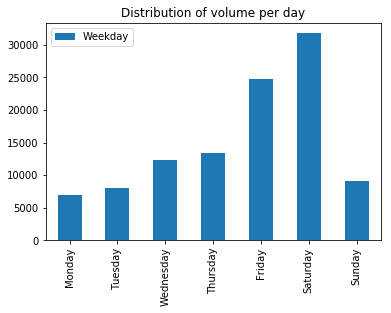

In [9]:
# store and plot the ditribution of volume per day

distribution_per_day = pd.DataFrame(terminated_rides["Weekday"].value_counts().loc[day_order])
distribution_per_day.plot(kind = "bar", title = "Distribution of volume per day")
plt.savefig("Distribution of volume per day", bbox_inches='tight')

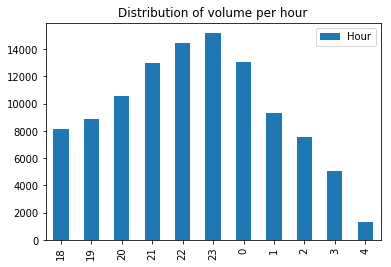

In [10]:
# store and plot the ditribution of volume per hour

distribution_per_hour = pd.DataFrame(terminated_rides["Hour"].value_counts().loc[hour_order]).plot(kind = "bar", title = "Distribution of volume per hour")
plt.savefig("Distribution of volume per hour", bbox_inches='tight')

We can also plot the distribution per hour for each day of the week :

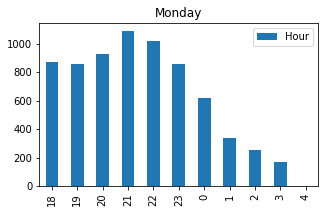

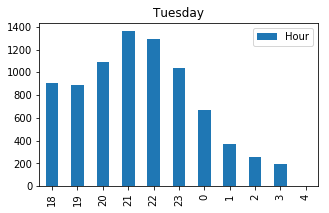

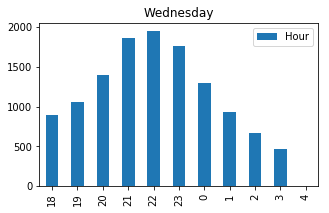

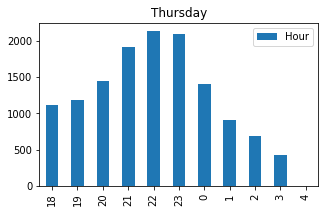

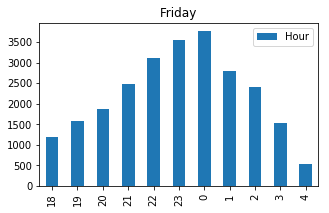

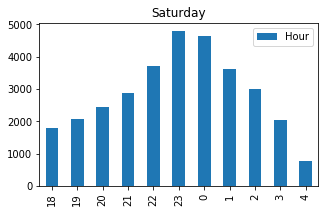

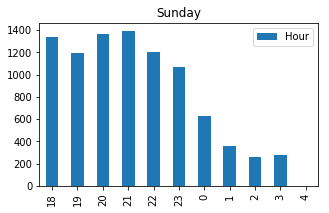

In [11]:
for day in distribution_per_day.index:
    pd.DataFrame(terminated_rides["Hour"][terminated_rides["Weekday"] == day]
                 .value_counts().loc[hour_order]).plot(kind = "bar", title = day, figsize = (5,3))
    plt.show()

We can conclude that : 

- The app is mostly used on week end days
- The app is mostly used between 8pm and 0am. Eventhough there is a public transport offer at these times of the night in most cities, the users rely more on VTCs.
- The friday and saturday night is the days where there are the most late-night travels

One way of improvement would be to plot probabilities distributions rather than volume distributions. 

# Drivers

### How many drivers drove each day of the extract ?

In [12]:
distrib_drives_driver = terminated_rides.pivot_table(index = "Driver Id", columns = "Weekday", aggfunc = "count").Id
print("There are", distrib_drives_driver.dropna().shape[0], "drivers among the", len(terminated_rides["Driver Id"].unique()), "drivers that drove each day of the week.")

There are 168 drivers among the 8212 drivers that drove each day of the week.


### The number of driver per day along the week ? 

In [13]:
print("The number of drivers per day is : ")

#Use a pivot table

num_driver_day = terminated_rides.pivot_table(index = "Driver Id", columns = "Weekday", aggfunc = "count").Id.count().loc[day_order]
num_driver_day

The number of drivers per day is : 


Weekday
Monday       1886
Tuesday      2091
Wednesday    2664
Thursday     2949
Friday       4437
Saturday     5188
Sunday       2459
dtype: int64

### What is the average and distribution of the number of days a driver rides on the platform in one week  ?

In [14]:
# Create a pivot table of each driver with their number of drives per day

distrib_drives_week = terminated_rides.pivot_table(index = "Driver Id", columns = "Weekday", aggfunc = "count").Id.count(axis = 1)

The average number of days worked is :  2.639308329274233


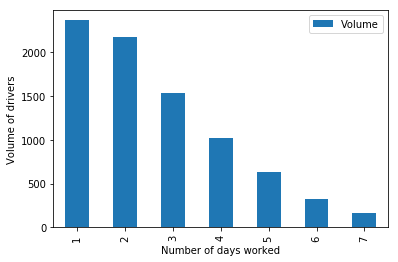

In [15]:
#Plot our list

print("The average number of days worked is : ", distrib_drives_week.mean())
distrib_drives_week.value_counts().plot(kind = "bar")
plt.xlabel("Number of days worked")
plt.ylabel("Volume of drivers")
plt.legend(["Volume"])
plt.savefig("Distribution of number of days worked", bbox_inches='tight')

### Per day, what is the average and distribution number of rides achieved per driver ? 

In [16]:
#Pivot table of the number of rides achieved per driver per day

distrib_rides_achi = terminated_rides.pivot_table(index = "Driver Id", columns = "Weekday", aggfunc = "count").Id.fillna(0)

In [17]:
#Set the order of values on the x-axis

order = [i for i in range(0,18)]

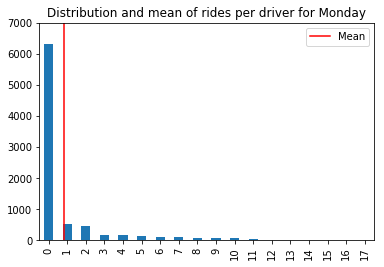

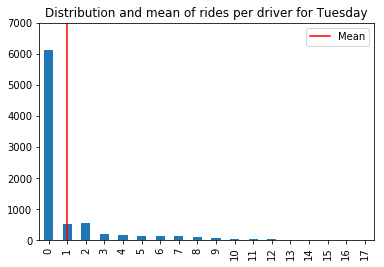

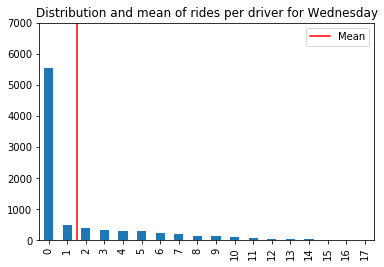

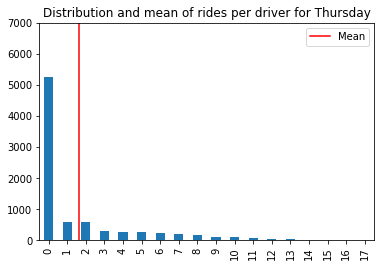

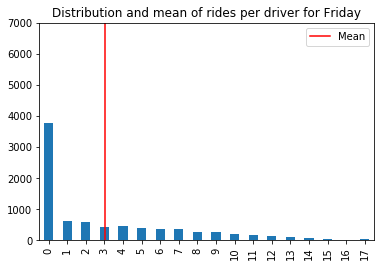

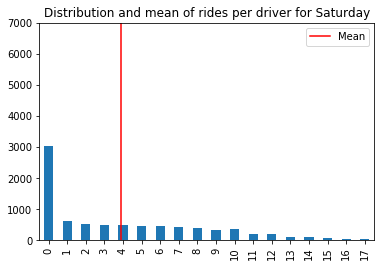

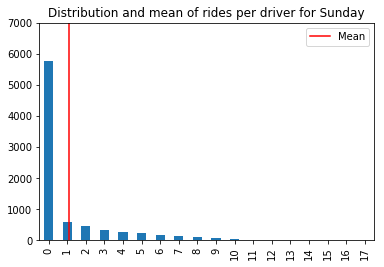

In [18]:
#Store the mean for each day
means = {}

#Plot the distribution of rides for each day

for day in day_order:
    dist = distrib_rides_achi[distrib_rides_achi[day].notnull()][day].value_counts().loc[order]
    mean = distrib_rides_achi[distrib_rides_achi[day].notnull()][day].mean()
    means[day] = np.round(mean)
    dist.plot(kind = "bar")
    plt.axvline(mean, color = "r", label = "Mean")
    plt.title("Distribution and mean of rides per driver for " + day)
    plt.legend(["Mean"])
    plt.ylim(0, 7000)
    plt.show()

In [19]:
print("The mean number of rides per driver per day is : \n \n \r", pd.Series(means).sort_values(ascending = False))

The mean number of rides per driver per day is : 
 
 Saturday     4.0
Friday       3.0
Thursday     2.0
Wednesday    1.0
Tuesday      1.0
Sunday       1.0
Monday       1.0
dtype: float64


This information correlates with the fact that the most drives happened on Saturday and Friday.

### What are your observations ?

* We confirm the previous observations that the platform is mostly used on weekends.
* Most of the drivers don't use the platform all week long (average of 3 days a week), maybe they work with other platforms on other days.
* Most of the drivers don't use the platgotm all business-day long. On saturday, they do 6 drives in average. If we assume a ride lasts 20 minutes in average (we don't have the exact information), 20*6 = 120 minutes. The drivers use the platform 120 minutes - 2 hours per day in average.

## Fares

### What is the average ride fare for successful rides ? Can we observe any correlation with other fields of the extract ?

In [20]:
#Store the fare for successful rides
success_mean_fare = terminated_rides["Estimated Price"].mean()

In [21]:
#Store the fare for driver-canceled rides
c_by_driver_mean_fare = data[data.State == "canceled_by_driver"]["Estimated Price"].mean()

In [22]:
#Store the fare for user-canceled rides
c_by_user_mean_fare = data[data.State == "canceled_by_user"]["Estimated Price"].mean()

In [23]:
print("The average fare for successful rides is",success_mean_fare,"euros.")

The average fare for successful rides is 12.487259500155085 euros.


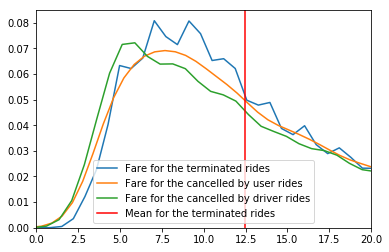

In [25]:
sns.kdeplot(terminated_rides["Estimated Price"])
sns.kdeplot(data[data.State == "canceled_by_driver"]["Estimated Price"])
sns.kdeplot(data[data.State == "canceled_by_user"]["Estimated Price"])
plt.xlim(0,20)
plt.axvline(success_mean_fare, color = "red")
plt.legend(["Fare for the terminated rides", "Fare for the cancelled by user rides", "Fare for the cancelled by driver rides", "Mean for the terminated rides"])

We can see that drivers tend to cancel the cheapest and shortest rides.

### What is the rate of rides pay with cash per origin county (French county correspond to the 2 first digits of the zipcode) ?

#### 1 - Engineer a "Zip code" feature

Getting the county/zip code information is quite hard since the geolocation data is a bit messy. For example, 

In [26]:
terminated_rides["Origin Address"][202005]

'1 Rue Anne Frank - Sainte-Geneviève-des-Bois, France'

is not a useful information. Let's do a bit of cleaning to get rides where the geolocation is valid.

In [27]:
#Split the strings to get a better data

terminated_rides["Detailed_origin_address"] = terminated_rides["Origin Address"].loc[terminated_rides["Origin Address"].notnull()].str.split(",| - ")
terminated_rides["Detailed_arrival_address"] = terminated_rides["Arrival Address"].loc[terminated_rides["Arrival Address"].notnull()].str.split(",| - ")

In [28]:
#Fill nan values

terminated_rides["Detailed_origin_address"].fillna("?????", inplace = True)
terminated_rides["Detailed_arrival_address"].fillna("?????", inplace = True)

In [29]:
#Get an origin counties list : the two-first characters of the address

Origin_counties = []

for ride in terminated_rides.index:
    Origin_counties.append(terminated_rides["Detailed_origin_address"][ride][1].replace("Paris", "75").strip(" ")[:2])
    
#create Pandas Series with list

terminated_rides["Origin_county"] = Origin_counties

In [30]:
#Same for arrival county

arrival_counties = []

for ride in terminated_rides.index:
    arrival_counties.append(terminated_rides["Detailed_arrival_address"][ride][1].strip(" ")[:2])
    
terminated_rides["Arrival_county"] = arrival_counties

#### 2 - Compute the share of cash payments per origin county

In [31]:
pivot = pd.DataFrame(terminated_rides.pivot_table(index = "Origin_county", values = "State", columns = "Payment Mode", aggfunc = "count"))

There's a lot of noise in the data because the zip code is not clear. Instead, let's just take the counties that had at least 500 drives paid with cash during the week.

In [32]:
pivot = pivot[pivot.cash > 500]

In [33]:
#Compute the rate of cash payments

pivot["Total"] = pivot.card+pivot.cash
pivot.rate_cash = (pivot.cash/pivot.Total)

In [34]:
print("The rate of cash payments per origin county is \n", np.round((pivot.rate_cash)*100))

The rate of cash payments per origin county is 
 Origin_county
75    60.0
77    70.0
78    68.0
91    71.0
92    65.0
93    78.0
94    68.0
95    75.0
dtype: float64


and is illustrated by : 
 AxesSubplot(0.125,0.125;0.775x0.755)


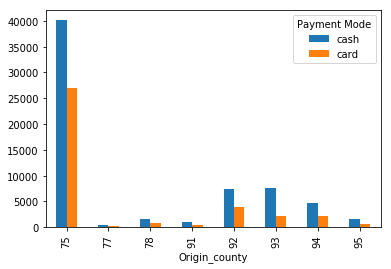

In [35]:
print("and is illustrated by : \n", pivot[["cash", "card"]].plot(kind = "bar"))

# Cancelation and failed requests

### For each day, how many passengers tried to order a ride but never got a positive answer to there request (As a reminder a successful request is tagged by a driver id not null) ?

In [36]:
all_requests = data[data["Driver Id"].notnull()]

In [37]:
requests_per_day = all_requests.groupby("Weekday").Id.count().sort_values()

In [38]:
data[data["Driver Id"].isnull()].groupby("Weekday").Id.count().sort_values()

Weekday
Monday        4598
Tuesday       5452
Sunday        7655
Thursday      8215
Wednesday     8830
Friday       13742
Saturday     16445
Name: Id, dtype: int64

In [39]:
failed_requests = data[data["Driver Id"].isnull()].groupby("Weekday").Id.count().sort_values()

In [40]:
print("The number of failed requests is :"), (failed_requests.sort_values())

The number of failed requests is :


(None, Weekday
 Monday        4598
 Tuesday       5452
 Sunday        7655
 Thursday      8215
 Wednesday     8830
 Friday       13742
 Saturday     16445
 Name: Id, dtype: int64)

In [41]:
print("The ratio of failed requests per day is : \n", np.round(((failed_requests/requests_per_day)*100).sort_values()))

The ratio of failed requests per day is : 
 Weekday
Saturday     40.0
Friday       44.0
Thursday     48.0
Monday       50.0
Tuesday      52.0
Wednesday    56.0
Sunday       63.0
Name: Id, dtype: float64


### For each day, what is the cancelation rate ? We only take into account rides that were accepted by a driver i.e with driver id not null.

In [42]:
canceled = all_requests[all_requests.State != "terminated"].groupby("Weekday").Id.count()

In [43]:
print("The rate of cancelled rides (Whether it be by the driver or by the user) is : \n", np.round((canceled/requests_per_day)*100))

The rate of cancelled rides (Whether it be by the driver or by the user) is : 
 Weekday
Friday       21.0
Monday       23.0
Saturday     23.0
Sunday       25.0
Thursday     22.0
Tuesday      24.0
Wednesday    23.0
Name: Id, dtype: float64


# Spatial Analysis

## The zipcode for paris are starting by (75), paris suburb Zipcodes start by (77 or 78 or 91 or 92 or 93 or 94 or 95)
## What is the share of terminated rides that involve the suburb in the parisian area Zipcodes in (75,77,78,91,92,93,94,95) ? 

In [44]:
suburbs= ["77","78","91","92","93","94","95"]
idf = ["75", "77","78","91","92","93","94","95"]

#Create a DF for all Ile de France

idf_rides = terminated_rides[(terminated_rides["Origin_county"].isin(idf)) | (terminated_rides["Arrival_county"].isin(idf))]

#Check if suburbs counties appear in terminated rides

suburb_involved = idf_rides[(idf_rides["Origin_county"].isin(suburbs)) | (idf_rides["Arrival_county"].isin(suburbs))]

In [45]:
print("The rate of rides with a suburb involved is", np.round((suburb_involved.shape[0]/idf_rides.shape[0])*100),"%")

The rate of rides with a suburb involved is 62.0 %


## Can you provide a flow matrix county/county with the number of terminated rides per pair from Paris (75) and its suburb (77,78,91,92,93,94,95)?

In [46]:
#From suburb to Paris

to_paris = terminated_rides[(terminated_rides["Origin_county"].isin(suburbs)) & (terminated_rides["Arrival_county"] == "75")]
count_to_paris = pd.DataFrame(to_paris.groupby("Origin_county").Id.count())

In [47]:
#From Paris to suburb

from_paris = terminated_rides[(terminated_rides["Origin_county"] == "75") & (terminated_rides["Arrival_county"].isin(suburbs))]
count_from_paris = pd.DataFrame(from_paris.groupby("Arrival_county").Id.count())

In [48]:
flow_matrix = pd.DataFrame(count_to_paris + count_from_paris).Id

In [49]:
print("This flow matrix shows the number of rides per pair Paris/Suburb : \n" , flow_matrix)

This flow matrix shows the number of rides per pair Paris/Suburb : 
 Origin_county
77      526
78     1940
91     1133
92    15422
93    10091
94     8375
95     1945
Name: Id, dtype: int64
